# Load Dataset from ~/data

>  Import libraries


In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import pandas as pd
from PIL import Image, ImageOps


> Define source directories

In [2]:
root = "../data"
labels = os.listdir(root)[:2]
datapath = []
for label in labels:
    datapath.append(os.path.join(root, label))
datapath


['../data/Uninfected', '../data/Parasitized']

>Display sample images


In [3]:
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10, 10
from random import randint

(-0.5, 102.5, 138.5, -0.5)

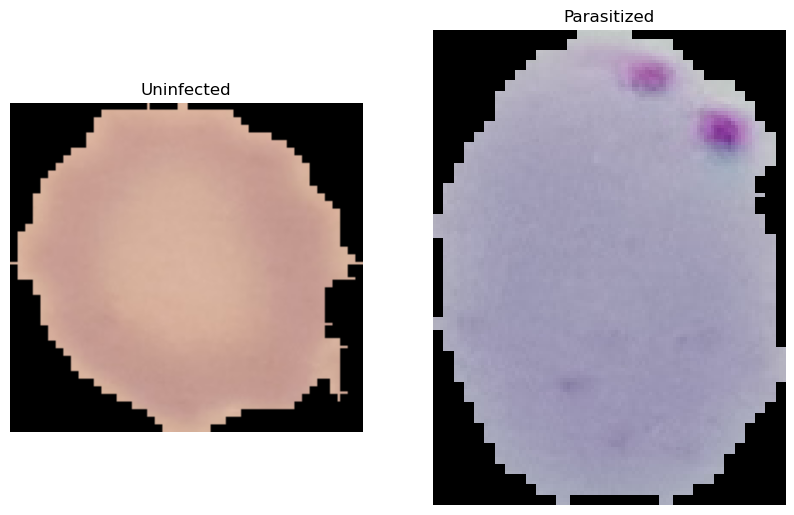

In [21]:
# select 2 random integers
uninf_index = randint(0, len(os.listdir(datapath[0])))
para_index = randint(0, len(os.listdir(datapath[1])))
# read two random images
img_uninfected = Image.open(
    os.path.join(
        datapath[0], os.listdir(datapath[0])[uninf_index]
    )
)
img_infected = Image.open(
    os.path.join(
        datapath[1], os.listdir(datapath[1])[para_index]
    )
)
# plot images
fig, ax = plt.subplots(1, 2)
ax[0].set_title(labels[0])
ax[0].imshow(img_uninfected)
ax[0].axis("off")
ax[1].set_title(labels[1])
ax[1].imshow(img_infected)
ax[1].axis("off")

> Scikit-Learn classification

We want to convert images to numpy arrays so that we can use them in scikit-learn.

In [10]:
# for each image in the folder create a vector and append it to the empty vector
from skimage.transform import resize
def create_vector(folder: str, size: int):
    img_vect = []
    for _ in os.listdir(folder):
        # open image and resize it to 50x50
        img = Image.open(os.path.join(folder, _))
        # convert image to numpy array
        numpy_img = np.asarray(img)
        # resize image
        img = resize(numpy_img, (size, size,3))
        # append image vector to the empty vector
        img_vect.append(numpy_img)
    return img_vect

In [11]:
# create empty vectors
uninf_imgs = create_vector(datapath[0], 50)
para_imgs = create_vector(datapath[1], 50)


image shape: (133, 139, 3)


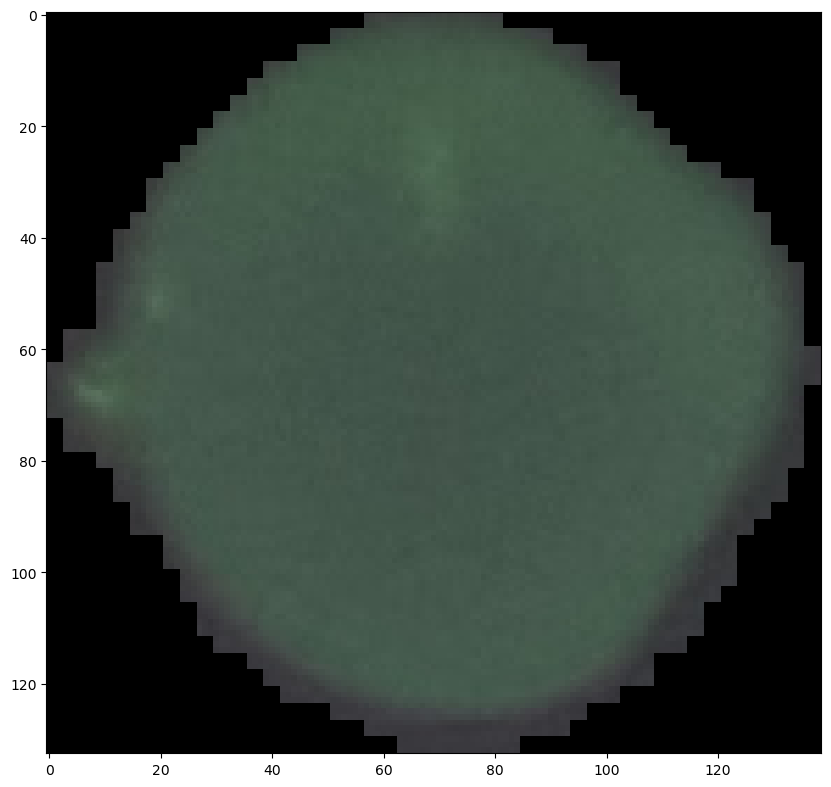

In [22]:
# test the np vector as image
file = para_imgs[para_index]
print(f"image shape: {np.shape(file)}")
img_resized = Image.fromarray((file*255).astype(np.uint8))
imgplot = plt.imshow(img_resized)
# create a dataframe with the images and the labels


In [19]:


# define empty dataframe to store image data
df = pd.DataFrame(columns=["Image", "label"])
# loop over labels
for label in labels:
    pwd = os.path.join(root, label)
    for _ in os.listdir(pwd):
        # load images then resize them to a fixed size
        img = cv2.imread(os.path.join(pwd, _))
        img = cv2.resize(img, (64, 64))
        # flatten the image into a list of raw pixel intensities then
        # add the image and label to our training data
        df = pd.concat([df, pd.DataFrame({"Image": [img], "label": [label]})])
df.head()


,Image,label
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Uninfected
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Uninfected
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Uninfected
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Uninfected
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",Uninfected
